# 6.6 - Sourcing & Analyzing Time Series Data
### Source: https://data.nasdaq.com/data/OECD-organisation-for-economic-cooperation-and-development

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [2]:
import nasdaqdatalink

## 2. Find a data set to work and import it into your Jupyter notebook. 
#### Ensure that this data somehow connects to the broader research topic for your Achievement project. The best data set would be one that shares a common key with your main data set, such as a geographic component, so you can merge the data, but this could be difficult to find, so it’s not a requirement.


#### Per Investopedia, 'The Organisation for Economic Co-operation and Development (OECD) is a group of 37 member countries (including USA) that discuss and develop economic and social policy.' Since being established in 1960, the organization one of many responsibilities include promoting economic growth. Considering that Airbnb is considered a hospitality type of service entity within the United States, Airbnb has stated in 2019 that it 'supported the development of a digital services tax regime being discussed by the Organisation for Economic Co-operation and Development (OECD) to bridge a divide between the United States and Europe.' As a result in a growing economy in the United States, Airbnb has been indicative of the same result within European countries as well. 


#### Source: https://www.investopedia.com/terms/o/oecd.asp
#### Source: https://www.reuters.com/article/us-oecd-tax-airbnb/airbnb-backs-oecd-approach-to-digital-services-tax-idUSKCN2572YI

## Make a subset of your data set if necessary. 


### Creating a subset of dataset is not necessary at this point.

In [3]:
# Incorporating API Key
quandl.ApiConfig.api_key = 'q9yMihx5TDbgJRLYbcEy'

In [4]:
data = quandl.get('OECD/MEI_BTS_COS_BVBUTE_CRI_BLSA_Q')

In [5]:
data.head()

,Value
Date,
2010-06-30,24.60000
2010-09-30,26.76768
2010-12-31,34.44444
2011-03-31,34.35897
2011-06-30,22.45989


In [6]:
data.shape

(49, 1)

In [7]:
data.columns

Index(['Value'], dtype='object')

## 4. Create a line chart of your data.

In [8]:
type(data)

pandas.core.frame.DataFrame

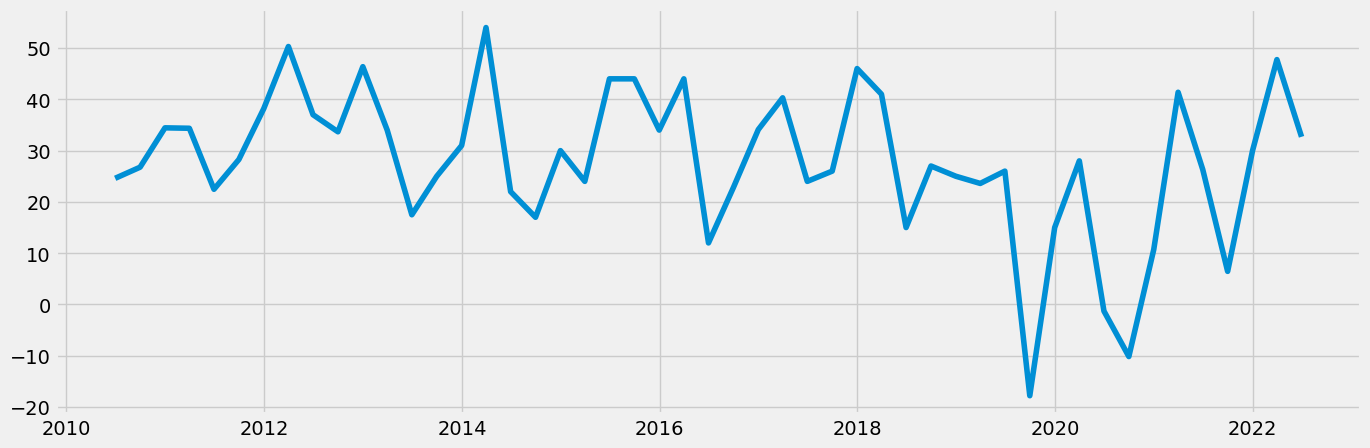

In [9]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) 
plt.plot(data)

### Resetting index 

In [10]:
data_2 = data.reset_index()

In [17]:
data_sub = data_2.loc[(data_2['Date'] >= '2018-03-31') & (data_2['Date'] < '2022-06-30')]

In [18]:
data_sub.shape

(17, 2)

In [19]:
data_sub.head()

,Date,Value
31,2018-03-31,41.0
32,2018-06-30,15.0
33,2018-09-30,27.0
34,2018-12-31,25.0
35,2019-03-31,23.6


In [20]:
from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['Date']) # Create a datetime column from "Date.""
data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
data_sub.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
data_sub.head()

,Value
datetime,
2018-03-31,41.0
2018-06-30,15.0
2018-09-30,27.0
2018-12-31,25.0
2019-03-31,23.6


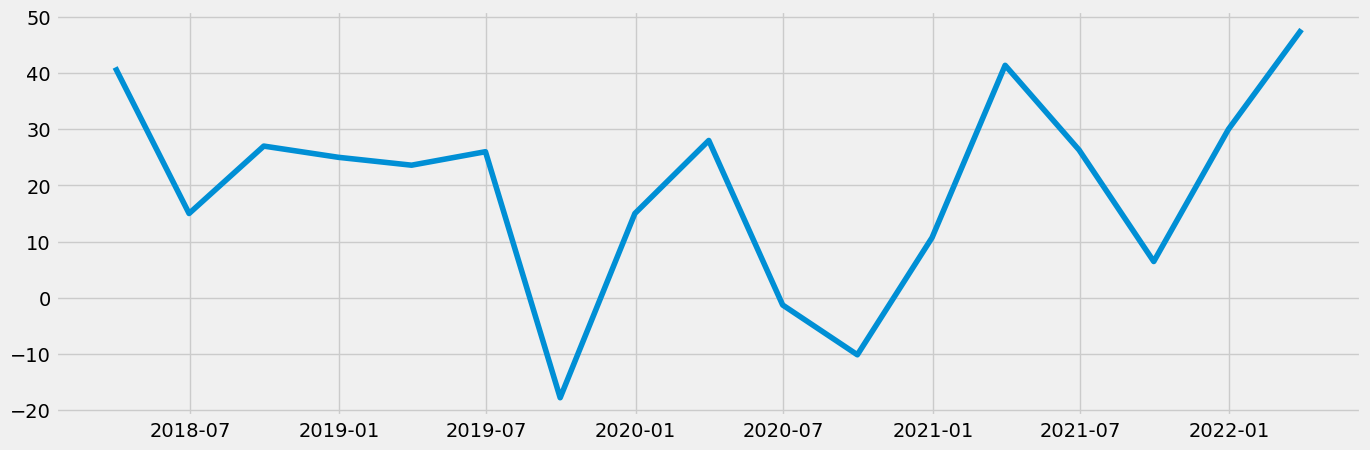

In [21]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

In [22]:
# Check for missing values

data_sub.isnull().sum() 

Value    0
dtype: int64

In [23]:
# Check for duplicates

data_dups = data_sub.duplicated()
data_dups.sum()

1

In [34]:
data_dups.drop_duplicates(keep=False,inplace=True)

In [35]:
data_sub.shape

(17, 1)

In [36]:
data_sub

,Value
datetime,
2018-03-31,41.000000
2018-06-30,15.000000
2018-09-30,27.000000
2018-12-31,25.000000
2019-03-31,23.600000
2019-06-30,26.000000
2019-09-30,-17.800000
2019-12-31,15.000000
2020-03-31,28.000000


## 5. Decompose the data’s components

In [37]:
decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

In [38]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

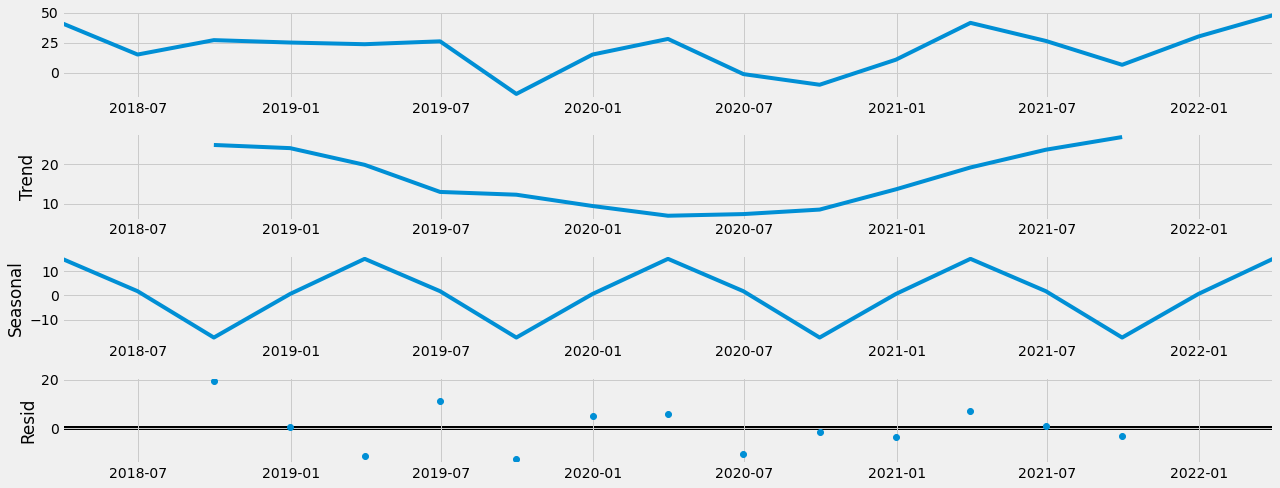

In [39]:
decomposition.plot()
plt.show()

### Analyze the results from the plot in a markdown cell.

### Observed: The base value is linear for the most part from 2018 to 2019, but contains curves afterwards from 2018 - 2022.

### Trend: The linear trend begins in 2019 and drops in curve until 2021, which means there is a decrease in behavior of the series over time.

### Seasonality: Seasonal fluctuations is not represented as curved or linear line, it is instead a repeated curve of behavior over time.

### Residual: The residual line indicates a variance of observations from 2018 to 2022.

## 6. Conduct a Dickey-Fuller test to check for stationarity.

In [40]:
from statsmodels.tsa.stattools import adfuller

def dickey_fuller(timeseries): 
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

dickey_fuller(data_sub['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                 -2.576923
p-value                         0.097861
Number of Lags Used             5.000000
Number of Observations Used    11.000000
Critical Value (1%)            -4.223238
Critical Value (5%)            -3.189369
Critical Value (10%)           -2.729839
dtype: float64


### Interpret the results in a markdown cell and reference your null hypothesis.


#### Since test statistic ( -2.576923) is larger than critical value of 5% (-3.189369) and critical value of 10% ( -2.729839) , we can’t reject null hypothesis. This means dataset is non-stationary. Since we checked for non-stationarity, we need to check for autocorrelation.

#### p-value in this case is 0.09 which is larger then a satisfactory p-value (p<0.05)

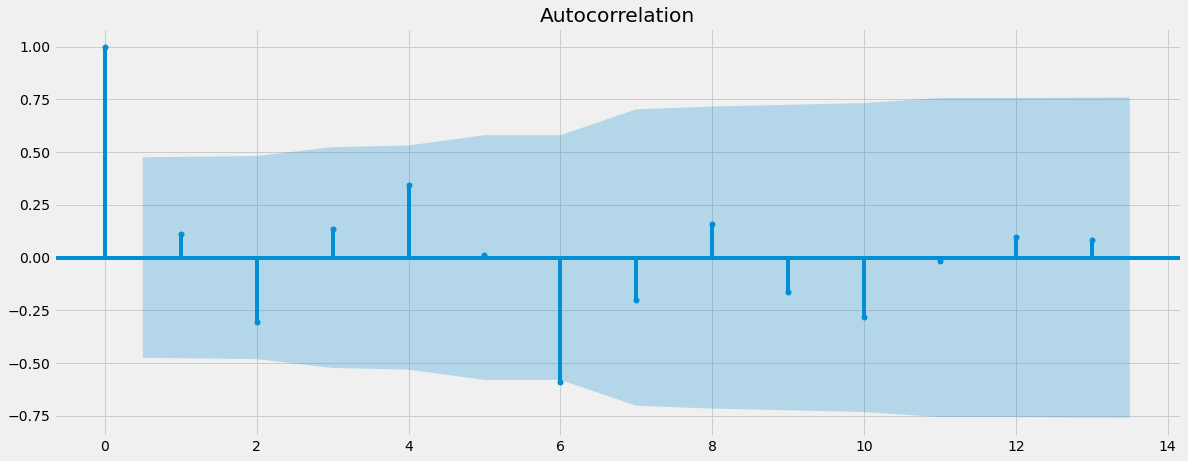

In [41]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_sub)
plt.show()

### As autocorrelations are often non-stationary, we need to further determine whether or not the data is stationary.

### 90% confidence interval
### Lags are not significantly correlated with one another since the lines within the chart do not go above the blue edge of the confidence interval. This indicates that data is stationary which follows what Dickey-Fuller test indicated.

## 6. If your data isn’t stationary, conduct a round of differencing on it and repeat step 6.
## 7. If your data still isn’t stationary, perform another round of differencing and repeat step 6.

### I will move forward with making dataset stationary, as I can compare result graphs. 

In [42]:
data_diff = data_sub - data_sub.shift(1)

In [43]:
data_diff.dropna(inplace = True)

In [44]:
data_diff.head()

,Value
datetime,
2018-06-30,-26.0
2018-09-30,12.0
2018-12-31,-2.0
2019-03-31,-1.4
2019-06-30,2.4


In [45]:
data_diff.columns

Index(['Value'], dtype='object')

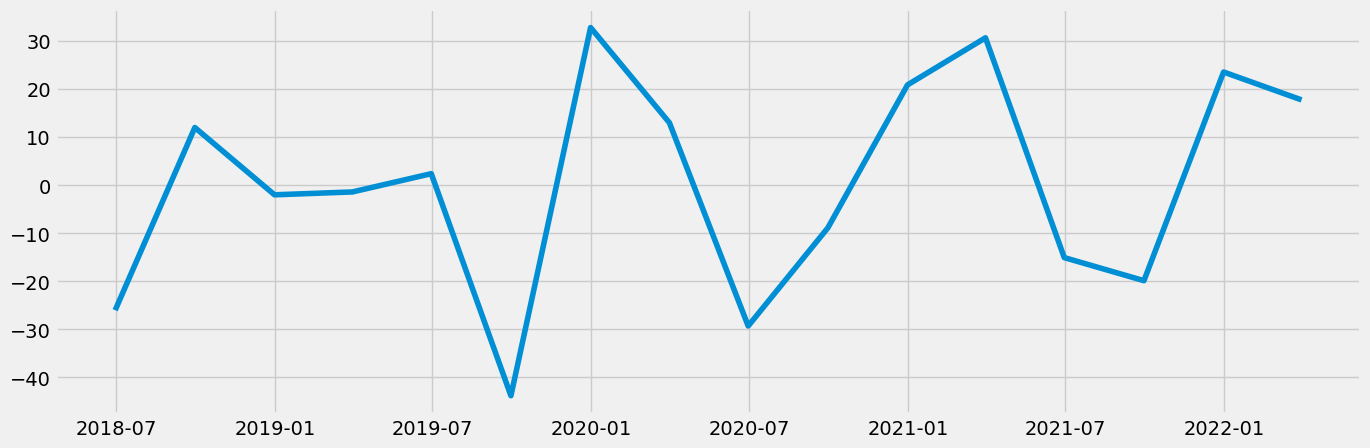

In [46]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [47]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -1.163905
p-value                        0.688927
Number of Lags Used            6.000000
Number of Observations Used    9.000000
Critical Value (1%)           -4.473135
Critical Value (5%)           -3.289881
Critical Value (10%)          -2.772382
dtype: float64


## 9. Check your data’s autocorrelations.

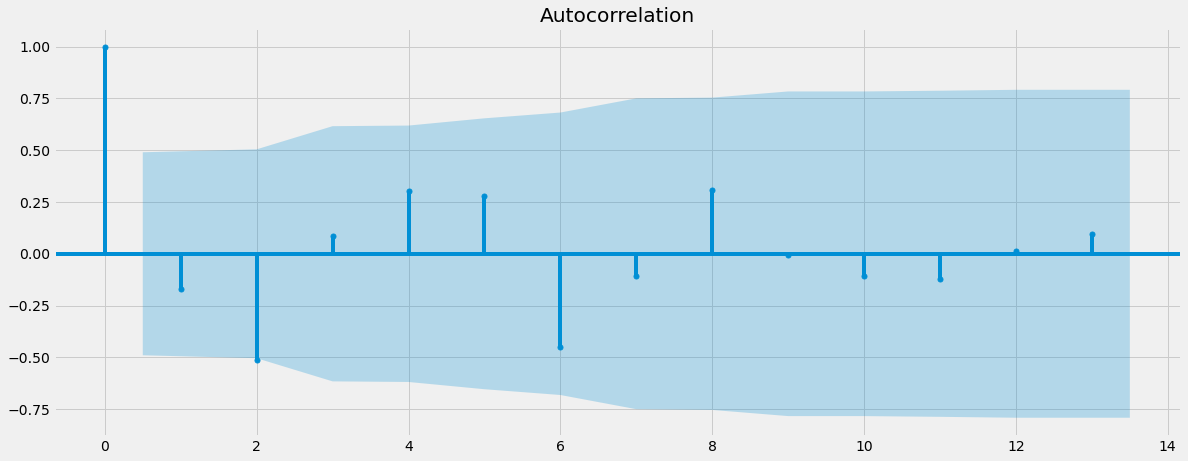

In [48]:
plot_acf(data_diff)
plt.show()

## Based on the chart above, the autocorrelation charts were indicative as stationary both times.